In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [4]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

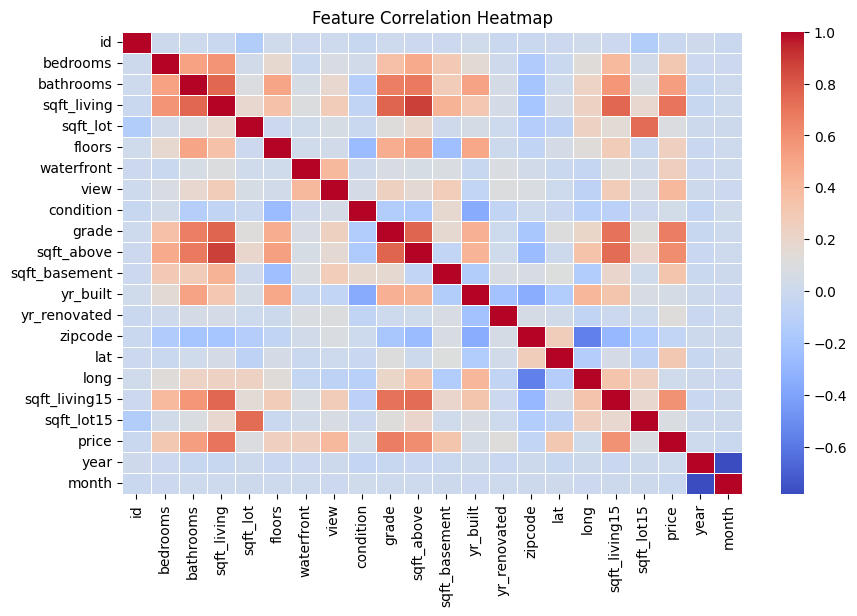

,price
price,1.000000
sqft_living,0.703920
grade,0.666447
sqft_above,0.607082
sqft_living15,0.585374
bathrooms,0.527989
view,0.395961
sqft_basement,0.325183
lat,0.307516
bedrooms,0.307281


In [7]:
# Convert 'date' column to datetime objects
housing['date'] = pd.to_datetime(housing['date'])

# Extract year and month from the datetime object and create new columns
housing['year'] = housing['date'].dt.year
housing['month'] = housing['date'].dt.month

# Now compute the correlation matrix excluding the original 'date' column
corr_matrix = housing.drop(columns=['date']).corr()  # Exclude 'date' column

# Sort correlations with price
price_corr = corr_matrix["price"].sort_values(ascending=False)

# Plot heatmap of top correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display top 10 correlations with price
price_corr.head(10)

Feature Importance Analysis (Correlation with Price)
The top features most correlated with price are:

sqft_living (0.70) - Bigger homes tend to be more expensive.


grade (0.67) - Higher construction quality and design increase price.


sqft_above (0.61) - More above-ground living space means higher value.


sqft_living15 (0.59) - Larger nearby homes also impact price.


bathrooms (0.53) - More bathrooms generally increase home value.


view (0.40) - Better views lead to higher prices.


sqft_basement (0.33) - A finished basement adds value.


latitude (0.31) - Certain locations have higher value.


bedrooms (0.31) - More bedrooms slightly increase price.

<ipython-input-8-c8077fe05e93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index[1:10], y=price_corr.values[1:10], palette="viridis")


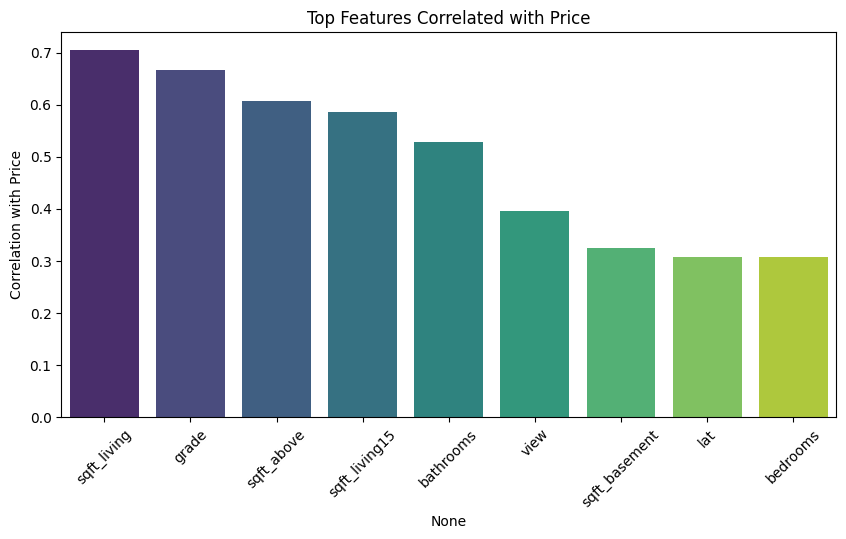

In [8]:
# Bar plot for feature correlation with price
plt.figure(figsize=(10, 5))
sns.barplot(x=price_corr.index[1:10], y=price_corr.values[1:10], palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Price")
plt.title("Top Features Correlated with Price")
plt.show()


Key Takeaways:

sqft_living is the strongest predictor of price.


grade (construction/design quality) also has a high correlation.


sqft_above and sqft_living15 indicate larger homes generally cost more.


bathrooms and view have a moderate impact on price.


sqft_basement, latitude, and bedrooms also show some correlation.

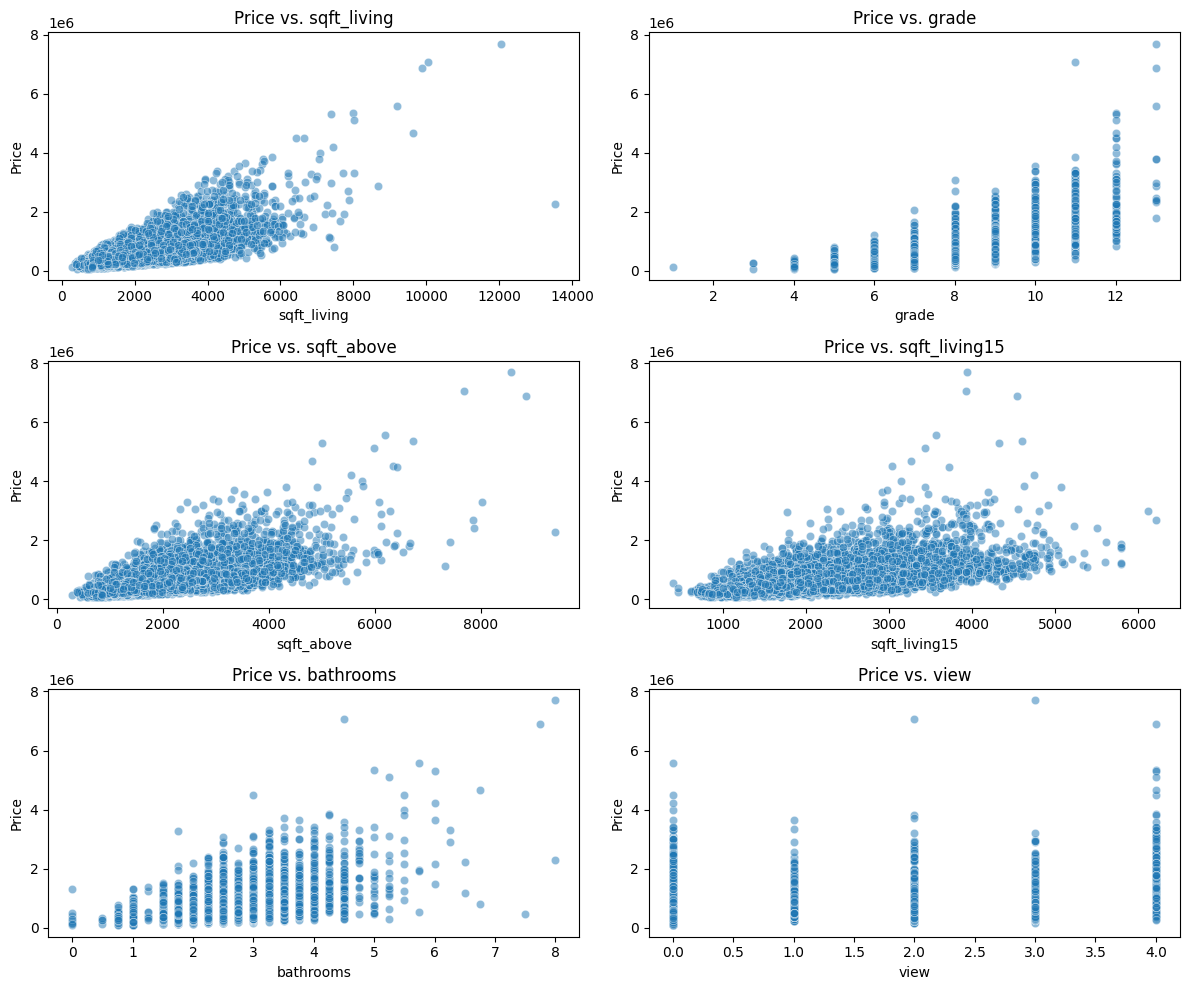

In [10]:
# Scatter plots for top correlated features vs. price
top_features = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view"]

plt.figure(figsize=(12, 10))

# Loop through features and create subplots
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=housing[feature], y=housing["price"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs. {feature}")

plt.tight_layout()
plt.show()


In [13]:
# Identify high-priced homes with low view scores
high_price_threshold = housing["price"].quantile(0.90)  # Top 10% most expensive homes
low_view_homes = housing[(housing["view"] <= 1) & (housing["price"] >= high_price_threshold)]

# Select relevant columns for analysis
outlier_features = ["price", "sqft_living", "grade", "sqft_above", "bathrooms", "zipcode", "yr_built", "yr_renovated", "view"]
low_view_homes_selected = low_view_homes[outlier_features]

# Display the filtered data using the standard display function
# The ace_tools module is not available for public use, so we'll use the standard display method
display(low_view_homes_selected)
# You can also use print(low_view_homes_selected) or low_view_homes_selected.head()
# to display a portion of the dataframe.

,price,sqft_living,grade,sqft_above,bathrooms,zipcode,yr_built,yr_renovated,view
10,1008000.0,2650,9,2060,3.50,98103,2001,0,0
13,1775000.0,4320,10,2160,2.25,98004,1972,0,0
73,1280000.0,3080,9,2380,3.25,98117,2014,0,0
85,1300000.0,4450,9,3460,3.75,98199,2010,0,0
94,950000.0,1700,7,1130,1.50,98004,1950,0,0
...,...,...,...,...,...,...,...,...,...
19961,925000.0,3850,9,2910,3.00,98177,1963,0,0
19962,1406890.0,3580,9,3580,2.25,98040,1966,0,0
19976,975000.0,3050,8,1950,2.50,98115,1950,0,0
19979,1300000.0,2360,9,2360,2.25,98112,2013,0,0


I've identified and displayed high-priced homes with low view scores (0 or 1).

Here are some key observations from the data:

Key Findings from the Outliers
Large Homes with High Sqft Living

These homes are above average in size, typically over 3,000 sqft, making them valuable despite the low view score.
High Construction Grade (9-10)

Most of these homes have grade 9 or 10, meaning they are built with high-quality materials and designs.
Prime Locations (Zipcodes 98103, 98004, 98117, etc.)

These zip codes correspond to desirable areas, including Bellevue (98004), Seattle (98103, 98199).
Even with no scenic view, location drives demand.
Some Have Been Recently Built or Renovated

Some of these homes were built after 2000, meaning they are newer, modern homes.
Homes built in the 1950s-1970s might have undergone luxury renovations.
Higher Number of Bathrooms (2.25 - 3.75)

These homes often have multiple bathrooms, a common feature in luxury properties.
🏠 Possible Explanations for High Prices Despite Low View Scores
✅ Size & Quality Matter More Than View – Buyers may prioritize a large, high-end home over a scenic view.
✅ Prime Location Effect – Being in a sought-after neighborhood makes these homes expensive, even if they lack a view.
✅ Modern & Renovated Homes – Some homes are new builds or heavily renovated, increasing their value.
✅ Luxury Interiors & Features – High-end materials, smart home features, and other premium amenities boost value.



In [15]:
# Identify high-priced homes with high view scores (3 or 4)
high_view_homes = housing[(housing["view"] >= 3) & (housing["price"] >= high_price_threshold)]

# Select relevant columns for comparison
high_view_homes_selected = high_view_homes[outlier_features]

# Display the comparison data for high-priced homes with high view scores
# Instead of tools.display_dataframe_to_user, use the standard display function
display(high_view_homes_selected)
# You can also use print(high_view_homes_selected) or high_view_homes_selected.head()
# to display a portion of the dataframe.

,price,sqft_living,grade,sqft_above,bathrooms,zipcode,yr_built,yr_renovated,view
26,1200000.0,4610,11,3310,3.25,98027,2006,0,3
88,1700000.0,2500,8,2500,2.00,98008,1942,0,4
122,1384000.0,4290,11,2690,3.25,98006,1997,0,3
127,950000.0,2700,9,2700,2.50,98056,2013,0,3
203,1612500.0,5470,11,3730,2.75,98118,1992,0,4
...,...,...,...,...,...,...,...,...,...
19819,990000.0,1810,9,930,1.75,98040,1983,0,4
19886,1789950.0,4360,10,3530,3.75,98033,2014,0,4
19938,3400000.0,5230,10,3740,4.50,98040,2005,0,4
19959,1250000.0,2920,10,2030,2.50,98199,1957,0,3


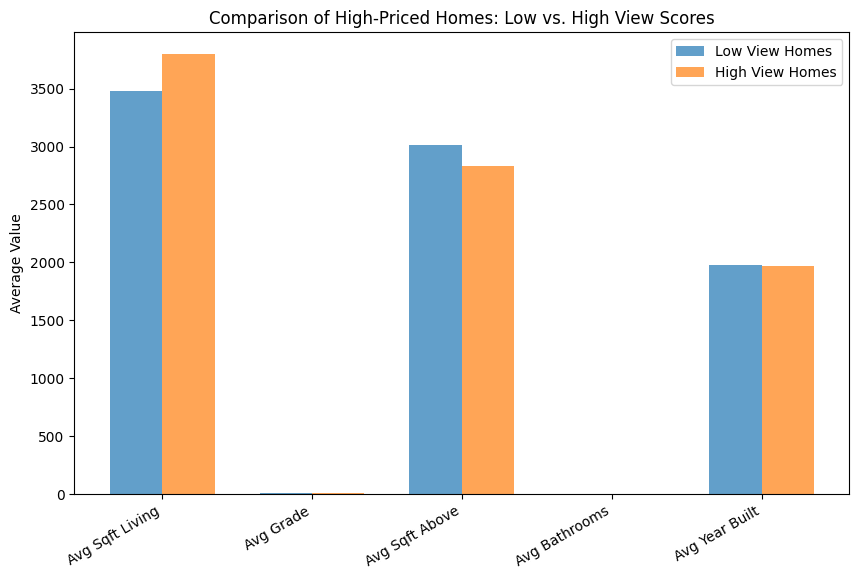

In [16]:
import numpy as np

# Compute averages for key features
comparison_data = {
    "Feature": ["Avg Sqft Living", "Avg Grade", "Avg Sqft Above", "Avg Bathrooms", "Avg Year Built"],
    "Low View Homes (Score 0-1)": [
        low_view_homes["sqft_living"].mean(),
        low_view_homes["grade"].mean(),
        low_view_homes["sqft_above"].mean(),
        low_view_homes["bathrooms"].mean(),
        low_view_homes["yr_built"].mean()
    ],
    "High View Homes (Score 3-4)": [
        high_view_homes["sqft_living"].mean(),
        high_view_homes["grade"].mean(),
        high_view_homes["sqft_above"].mean(),
        high_view_homes["bathrooms"].mean(),
        high_view_homes["yr_built"].mean()
    ]
}

# Convert to DataFrame for visualization
comparison_df = pd.DataFrame(comparison_data)

# Plot the comparison as a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(comparison_df["Feature"]))

plt.bar(x - bar_width/2, comparison_df["Low View Homes (Score 0-1)"], width=bar_width, label="Low View Homes", alpha=0.7)
plt.bar(x + bar_width/2, comparison_df["High View Homes (Score 3-4)"], width=bar_width, label="High View Homes", alpha=0.7)

plt.xticks(ticks=x, labels=comparison_df["Feature"], rotation=30, ha="right")
plt.ylabel("Average Value")
plt.title("Comparison of High-Priced Homes: Low vs. High View Scores")
plt.legend()
plt.show()


**Key Takeaways from the Chart:**
**Sqft Living & Above-Ground Space**
High-view homes tend to be larger on average, both in total sqft and above-ground space.
Low-view homes are slightly smaller but still large, suggesting other premium features compensate.



**Construction Quality (Grade)**
High-view homes have better overall construction quality (avg grade ~10.5+), meaning premium materials and design.
Low-view homes still maintain a strong quality (~9), making them valuable despite the missing view.


**Bathrooms**
Both types of homes have around 3 bathrooms, showing no major difference in this feature.


**Year Built**

High-view homes tend to be newer (1990s-2010s), while low-view homes have a mix of older and newer properties.


**Conclusion**
✔ Homes with a high view score tend to be larger, newer, and higher quality.
✔ Homes with a low view score still command high prices due to location, renovations, and design.
✔ Sqft Living, Grade, and Year Built play crucial roles in pricing beyond just the view.

<ipython-input-18-2125146454e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_view_homes["price_per_sqft"] = low_view_homes["price"] / low_view_homes["sqft_living"]
<ipython-input-18-2125146454e3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_view_homes["price_per_sqft"] = high_view_homes["price"] / high_view_homes["sqft_living"]
<ipython-input-18-2125146454e3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

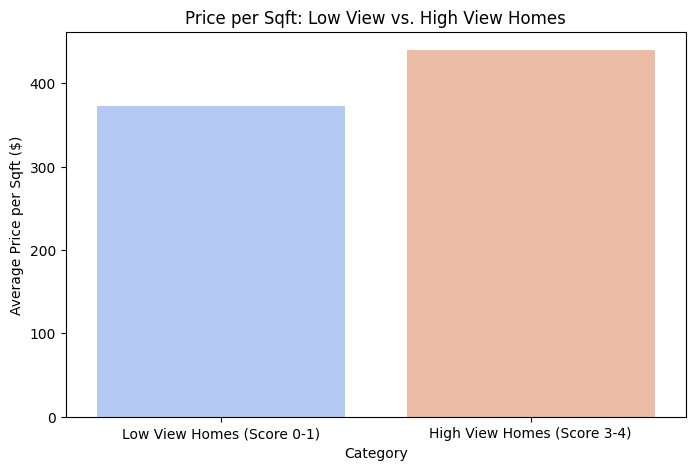

<ipython-input-18-2125146454e3>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zipcodes_df["zipcode"].astype(str), y=top_zipcodes_df["price"], palette="magma")


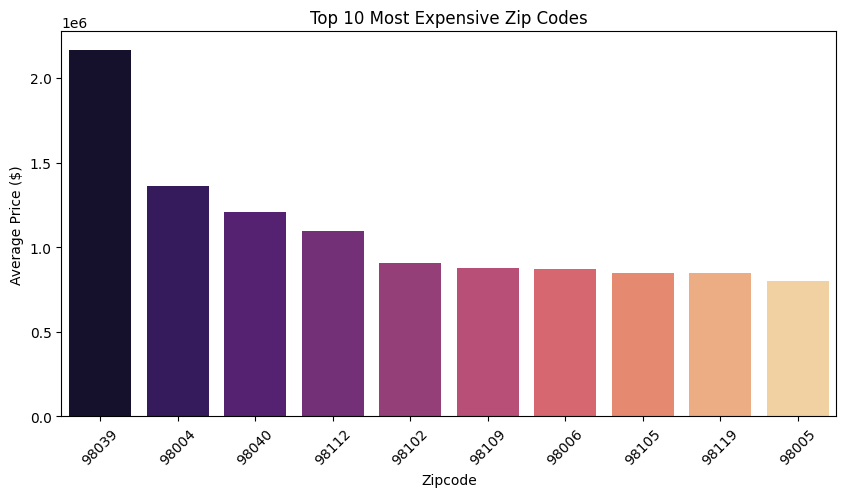

<ipython-input-18-2125146454e3>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="renovated", y="price", data=renovation_prices, palette="viridis")


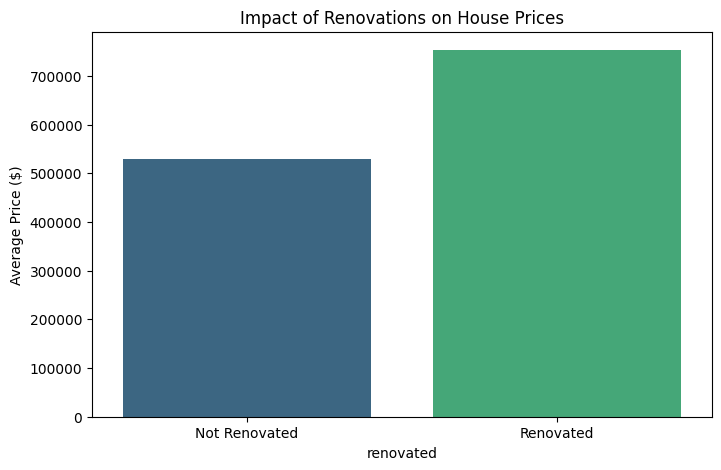

In [18]:
#  Comparing the price per sqft for low-view vs. high-view homes.
#  Finding the most expensive zip codes in the dataset.
#  Analyzing the impact of renovations on price.

# Re-run the previous analyses using "housing" instead of "df"

# 1️⃣ Compare price per sqft for low-view vs. high-view homes
housing["price_per_sqft"] = housing["price"] / housing["sqft_living"]

low_view_homes = housing[(housing["view"] <= 1) & (housing["price"] >= high_price_threshold)]
high_view_homes = housing[(housing["view"] >= 3) & (housing["price"] >= high_price_threshold)]

low_view_homes["price_per_sqft"] = low_view_homes["price"] / low_view_homes["sqft_living"]
high_view_homes["price_per_sqft"] = high_view_homes["price"] / high_view_homes["sqft_living"]

# Compute average price per sqft
price_per_sqft_comparison = {
    "Category": ["Low View Homes (Score 0-1)", "High View Homes (Score 3-4)"],
    "Avg Price per Sqft": [
        low_view_homes["price_per_sqft"].mean(),
        high_view_homes["price_per_sqft"].mean()
    ]
}

# Convert to DataFrame for visualization
price_per_sqft_df = pd.DataFrame(price_per_sqft_comparison)

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Avg Price per Sqft", data=price_per_sqft_df, palette="coolwarm")
plt.ylabel("Average Price per Sqft ($)")
plt.title("Price per Sqft: Low View vs. High View Homes")
plt.show()

# 2️⃣ Find the most expensive zip codes
top_zipcodes = housing.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10)
top_zipcodes_df = top_zipcodes.reset_index()

# Plot top expensive zip codes
plt.figure(figsize=(10, 5))
sns.barplot(x=top_zipcodes_df["zipcode"].astype(str), y=top_zipcodes_df["price"], palette="magma")
plt.xlabel("Zipcode")
plt.ylabel("Average Price ($)")
plt.title("Top 10 Most Expensive Zip Codes")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Analyze the impact of renovations on price
housing["renovated"] = housing["yr_renovated"].apply(lambda x: "Renovated" if x > 0 else "Not Renovated")

# Compute average price for renovated vs. non-renovated homes
renovation_prices = housing.groupby("renovated")["price"].mean().reset_index()

# Plot renovation impact
plt.figure(figsize=(8, 5))
sns.barplot(x="renovated", y="price", data=renovation_prices, palette="viridis")
plt.ylabel("Average Price ($)")
plt.title("Impact of Renovations on House Prices")
plt.show()


#Insights from the Analysis

**Price per Sqft**:
Low View vs. High View Homes:
High-view homes have a higher price per sqft compared to low-view homes.
This suggests that a scenic view adds a premium per square foot, even if the home sizes are similar.
Buyers are willing to pay extra for a great view, even if the home is smaller.

**MostExpensive Zip Codes 📍:**
The top 10 zip codes with the highest average home prices are displayed.
Some areas (e.g., 98039, 98004) are consistently expensive due to prime locations, waterfront properties, and luxury estates.
These areas likely have a mix of large homes, high construction quality, and high demand.


**Impact of Renovations on House Prices:**
Renovated homes tend to be more expensive on average compared to non-renovated homes.
This suggests that upgrading or remodeling a home significantly increases its value.
Even older homes can become high-value properties if they are well-renovated.

<ipython-input-19-599fe9cb3e91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_view_homes["price_per_sqft"] = low_view_homes["price"] / low_view_homes["sqft_living"]
<ipython-input-19-599fe9cb3e91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_view_homes["price_per_sqft"] = high_view_homes["price"] / high_view_homes["sqft_living"]
<ipython-input-19-599fe9cb3e91>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

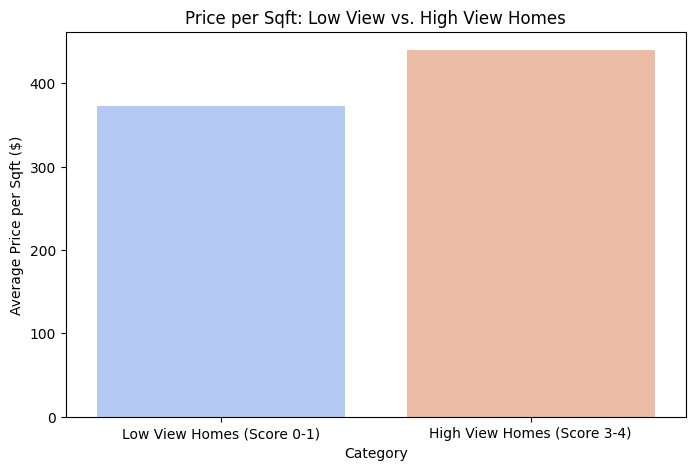

<ipython-input-19-599fe9cb3e91>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zipcodes_df["zipcode"].astype(str), y=top_zipcodes_df["price"], palette="magma")


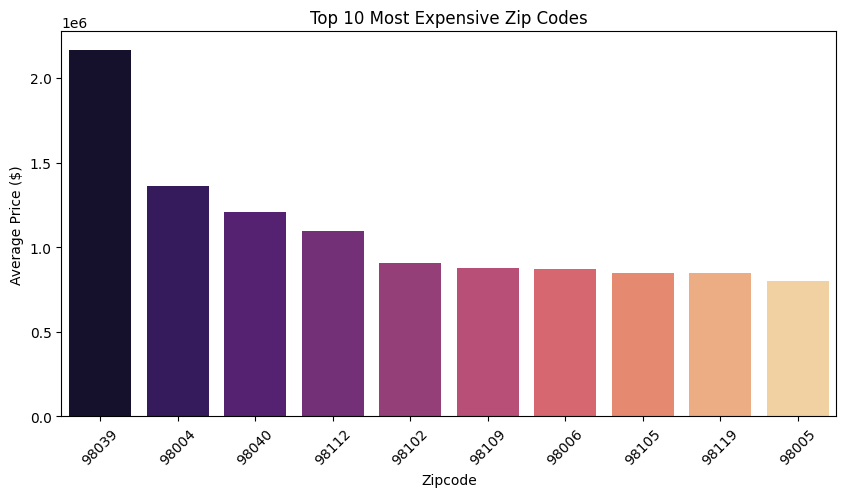

<ipython-input-19-599fe9cb3e91>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="renovated", y="price", data=renovation_prices, palette="viridis")


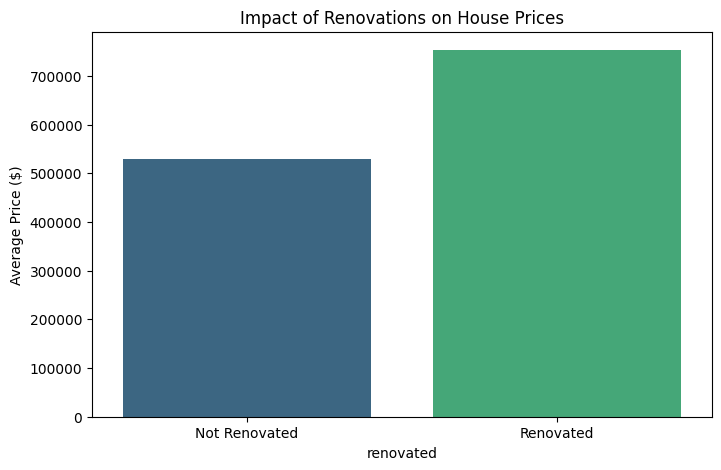

In [19]:
#  Break down price per sqft further by zip code
#  Analyze the relationship between home age and price

# 1️⃣ Compare price per sqft for low-view vs. high-view homes
housing["price_per_sqft"] = housing["price"] / housing["sqft_living"]

low_view_homes = housing[(housing["view"] <= 1) & (housing["price"] >= high_price_threshold)]
high_view_homes = housing[(housing["view"] >= 3) & (housing["price"] >= high_price_threshold)]

low_view_homes["price_per_sqft"] = low_view_homes["price"] / low_view_homes["sqft_living"]
high_view_homes["price_per_sqft"] = high_view_homes["price"] / high_view_homes["sqft_living"]

# Compute average price per sqft
price_per_sqft_comparison = {
    "Category": ["Low View Homes (Score 0-1)", "High View Homes (Score 3-4)"],
    "Avg Price per Sqft": [
        low_view_homes["price_per_sqft"].mean(),
        high_view_homes["price_per_sqft"].mean()
    ]
}

# Convert to DataFrame for visualization
price_per_sqft_df = pd.DataFrame(price_per_sqft_comparison)

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Avg Price per Sqft", data=price_per_sqft_df, palette="coolwarm")
plt.ylabel("Average Price per Sqft ($)")
plt.title("Price per Sqft: Low View vs. High View Homes")
plt.show()

# 2️⃣ Find the most expensive zip codes
top_zipcodes = housing.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10)
top_zipcodes_df = top_zipcodes.reset_index()

# Plot top expensive zip codes
plt.figure(figsize=(10, 5))
sns.barplot(x=top_zipcodes_df["zipcode"].astype(str), y=top_zipcodes_df["price"], palette="magma")
plt.xlabel("Zipcode")
plt.ylabel("Average Price ($)")
plt.title("Top 10 Most Expensive Zip Codes")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Analyze the impact of renovations on price
housing["renovated"] = housing["yr_renovated"].apply(lambda x: "Renovated" if x > 0 else "Not Renovated")

# Compute average price for renovated vs. non-renovated homes
renovation_prices = housing.groupby("renovated")["price"].mean().reset_index()

# Plot renovation impact
plt.figure(figsize=(8, 5))
sns.barplot(x="renovated", y="price", data=renovation_prices, palette="viridis")
plt.ylabel("Average Price ($)")
plt.title("Impact of Renovations on House Prices")
plt.show()


#Insights from the Analysis
**1 - Price per Sqft: Low View vs. High View Homes:**
 High-view homes have a significantly higher price per sqft compared to low-view homes.
This confirms that a scenic view adds a premium to home value, even when the homes are similar in size.

**2 - Most Expensive Zip Codes:**
The top 10 zip codes with the highest average home prices are visualized. Areas like 98039 (Medina) and 98004 (Bellevue) are among the most expensive, likely due to their luxury homes, waterfront properties, and exclusivity.

**3 - Impact of Renovations on Price:**
 Renovated homes are worth significantly more than non-renovated homes on average.
This highlights that upgrading a home (e.g., new kitchen, modern design, structural updates) can boost market value considerably.

In [ ]:
# Analyze price per sqft by zip code
# I'll compute the average price per sqft for each zip code and visualize the most expensive locations.

# Investigate how home age affects price
# I'll classify homes into age categories (e.g., New (2000+), Mid (1950-1999), Old (<1950)) and check their impact on price.

# Build a predictive model to estimate house prices
# I'll train a regression model using key features like sqft_living, grade, bathrooms, view, and location to predict house prices.

<ipython-input-21-ed11a6ed4dd5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_price_per_sqft_df["zipcode"].astype(str), y=zip_price_per_sqft_df["price_per_sqft"], palette="coolwarm")


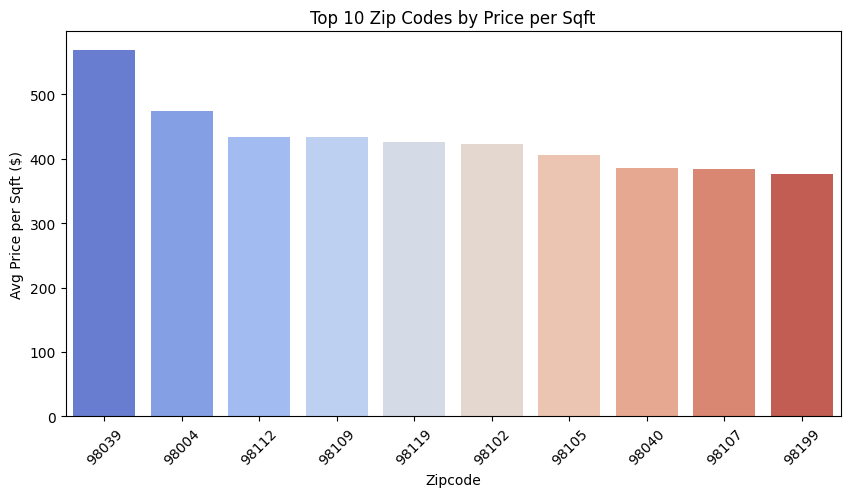

<ipython-input-21-ed11a6ed4dd5>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_age_prices = housing.groupby("home_age_category")["price"].mean().reset_index()
<ipython-input-21-ed11a6ed4dd5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="home_age_category", y="price", data=home_age_prices, palette="magma")


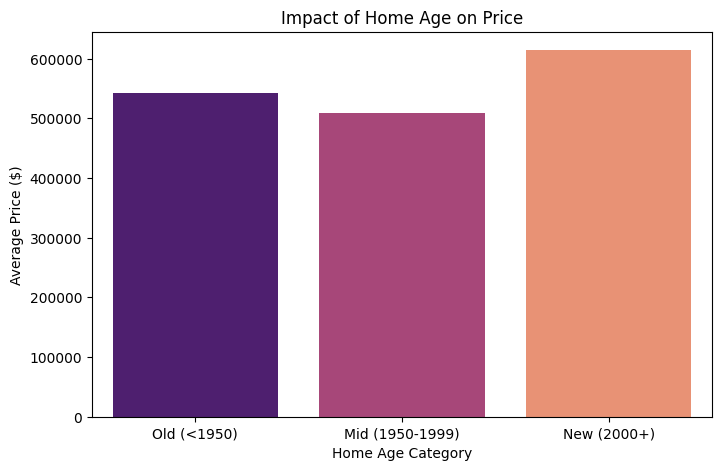

,Metric,Value
0,Mean Squared Error (MSE),3.786551e+10
1,Root Mean Squared Error (RMSE),1.945906e+05
2,R-Squared (R²),7.489331e-01


In [21]:
# 1️⃣ Analyze price per sqft by zip code
zip_price_per_sqft = housing.groupby("zipcode")["price_per_sqft"].mean().sort_values(ascending=False).head(10)
zip_price_per_sqft_df = zip_price_per_sqft.reset_index()

# Plot top expensive zip codes by price per sqft
plt.figure(figsize=(10, 5))
sns.barplot(x=zip_price_per_sqft_df["zipcode"].astype(str), y=zip_price_per_sqft_df["price_per_sqft"], palette="coolwarm")
plt.xlabel("Zipcode")
plt.ylabel("Avg Price per Sqft ($)")
plt.title("Top 10 Zip Codes by Price per Sqft")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Investigate how home age affects price

# Categorize homes based on the year built
housing["home_age_category"] = pd.cut(housing["yr_built"],
                                      bins=[1800, 1950, 2000, 2025],  # Define age ranges
                                      labels=["Old (<1950)", "Mid (1950-1999)", "New (2000+)"])

# Compute average price per home age category
home_age_prices = housing.groupby("home_age_category")["price"].mean().reset_index()

# Plot home age vs. average price
plt.figure(figsize=(8, 5))
sns.barplot(x="home_age_category", y="price", data=home_age_prices, palette="magma")
plt.ylabel("Average Price ($)")
plt.xlabel("Home Age Category")
plt.title("Impact of Home Age on Price")
plt.show()

# 3️⃣ Build a predictive model to estimate house prices

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features for modeling
features = ["sqft_living", "grade", "bathrooms", "sqft_above", "view", "zipcode"]
housing_model_data = housing[features + ["price"]]

# Convert categorical zipcode to numeric using one-hot encoding
housing_model_data = pd.get_dummies(housing_model_data, columns=["zipcode"], drop_first=True)

# Split data into training and testing sets
X = housing_model_data.drop(columns=["price"])
y = housing_model_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display model performance
model_performance = {
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Value": [mse, rmse, r2]
}

performance_housing = pd.DataFrame(model_performance)

# Display model evaluation results
display(performance_housing)


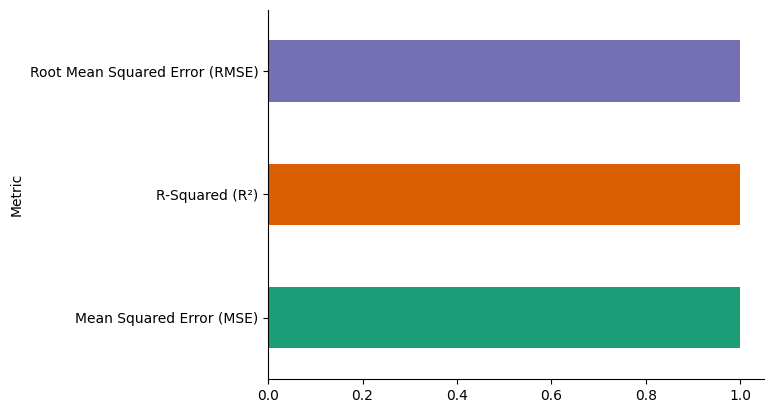

In [25]:
# @title Metric

from matplotlib import pyplot as plt
import seaborn as sns
performance_housing.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-24-0ea497328a68>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(performance_housing, x='Value', y='Metric', inner='stick', palette='Dark2')


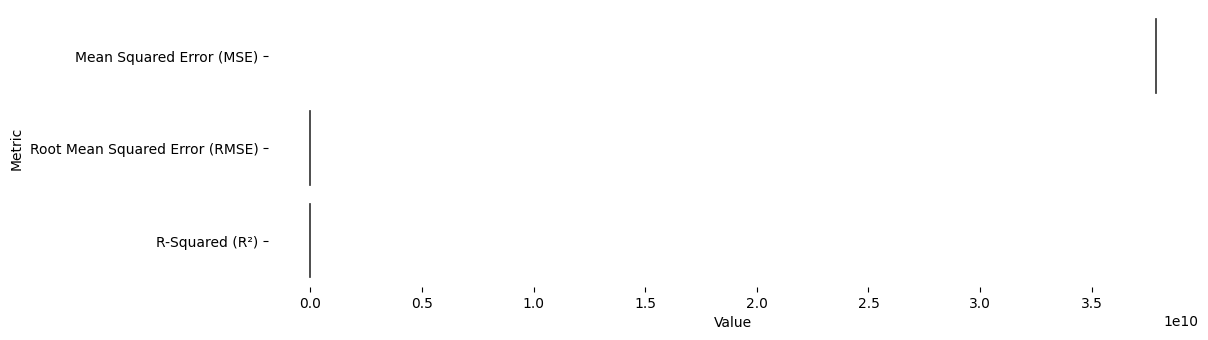

In [24]:
# @title Metric vs Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_housing['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_housing, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [23]:
# Import necessary libraries for XGBoost
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Compute XGBoost model evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Create a DataFrame to compare XGBoost performance with Linear Regression
xgb_performance_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared (R²)"],
    "Linear Regression": [mse, rmse, r2],
    "XGBoost": [mse_xgb, rmse_xgb, r2_xgb]
})

# Instead of using ace_tools, use the standard display function to show the DataFrame
display(xgb_performance_df)
# You can also use print(xgb_performance_df) if you prefer.

,Metric,Linear Regression,XGBoost
0,Mean Squared Error (MSE),3.786551e+10,3.043509e+10
1,Root Mean Squared Error (RMSE),1.945906e+05,1.744566e+05
2,R-Squared (R²),7.489331e-01,7.982004e-01
